In [3]:
!pip install fbprophet

In [4]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet as prop

In [5]:
def tree_regression(ser, column):
  future_days = 30

  dataset = ser
  dataset['Predictions'] = ser.shift(-future_days)

  X = np.array(dataset.drop(['Predictions'],1))[:-future_days]
  y = np.array(dataset['Predictions'])[:-future_days]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  tree = DecisionTreeRegressor().fit(x_train, y_train)
  tree_prediction = tree.predict(x_test)

  # Plot Random forest
  predictions = tree_prediction
  valid = dataset[x_train.shape[0]:-future_days]
  valid['Predictions'] = predictions
  plt.figure(figsize=(15,8))
  plt.xlabel('Days')
  plt.ylabel('Cases')
  plt.plot(dataset[column][:-future_days])
  plt.plot(valid[[column, 'Predictions']])
  plt.legend(['Original', 'Valid data', 'Predicted Data'])
  plt.show()


def rf_regression(ser, column):
  future_days = 30

  dataset = ser
  dataset['Predictions'] = ser.shift(-future_days)

  X = np.array(dataset.drop(['Predictions'],1))[:-future_days]
  y = np.array(dataset['Predictions'])[:-future_days]
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  rf = RandomForestRegressor().fit(x_train, y_train)
  rf_prediction = rf.predict(x_test)

  # Plot Random forest
  predictions = rf_prediction
  valid = dataset[x_train.shape[0]:-future_days]
  valid['Predictions'] = predictions
  plt.figure(figsize=(15,8))
  plt.xlabel('Days')
  plt.ylabel('Cases')
  plt.plot(dataset[column][:-future_days])
  plt.plot(valid[[column, 'Predictions']])
  plt.legend(['Original', 'Valid data', 'Predicted Data'])
  plt.show()


def fb_prediction(df, col1, col2):
  df = df.rename(columns = {col1:"ds",col2:"y"})
  train_len = math.ceil(len(df))
  train = df[:train_len]
  test = df[train_len:]

  m = prop(daily_seasonality=True)
  m.fit(train)

  future = m.make_future_dataframe(periods=200) #we need to specify the number of days in future
  prediction = m.predict(future)

  m.plot(prediction)
  plt.title("Prediction of the Covid-19 cases")
  plt.xlabel("Date")
  plt.ylabel("Daily Cases")
  plt.show()

**Scientific Data Visualisation - Mini Project**


---


Group members:
1. Mohamad Hiezam bin Hassan   BS17110027
2. Sahdan Chung     BS17160646           

# Data Load

In [7]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_data.csv')
gender_data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/DeathByGender%20(1).csv')
covid_daily = pd.read_csv('https://github.com/hiezam98/covid19/raw/main/covidDaily.csv')[:-3]

# Question 1

In [11]:
q1_df = covid_daily.copy()
future_days = 30

q1_df = q1_df[['Daily']]
q1_df['Predictions'] = q1_df[['Daily']].shift(-future_days)
X = np.array(q1_df.drop(['Predictions'],1))[:-future_days]
y = np.array(q1_df['Predictions'])[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

prop_df = covid_daily[['Date', 'Daily']]
prop_df['Date'] = pd.to_datetime(prop_df['Date'], format='%d/%m/%Y')
prop_df = prop_df.rename(columns = {'Date':"ds", 'Daily':"y"})
train_len = math.ceil(len(prop_df)*0.8)
prop_train = prop_df[:train_len]
prop_test = prop_df[train_len:]

rf = RandomForestRegressor().fit(x_train, y_train)
tree = DecisionTreeRegressor().fit(x_train, y_train)

rf_prediction = rf.predict(x_test)
tree_prediction = tree.predict(x_test)

m = prop(daily_seasonality=True)
m.fit(prop_train)
future = m.make_future_dataframe(periods=260) #we need to specify the number of days in future
fbp_prediction = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



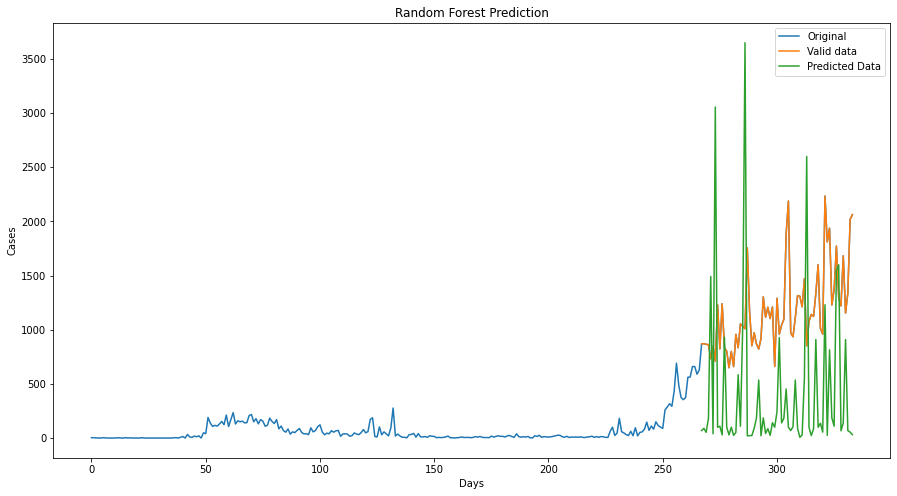

In [12]:
# Plot Random forest
predictions = rf_prediction
valid = q1_df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Random Forest Prediction')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(q1_df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



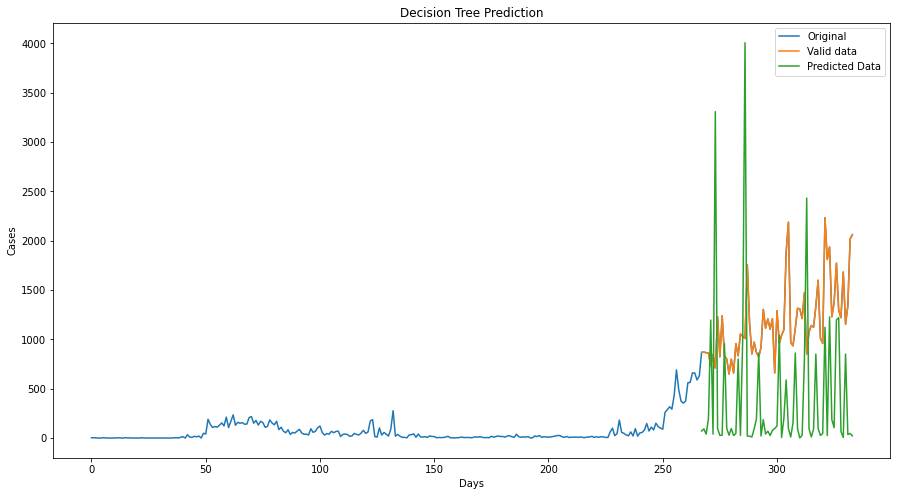

In [13]:
# Plot Decision Tree
predictions = tree_prediction
valid = q1_df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Decision Tree Prediction')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(q1_df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

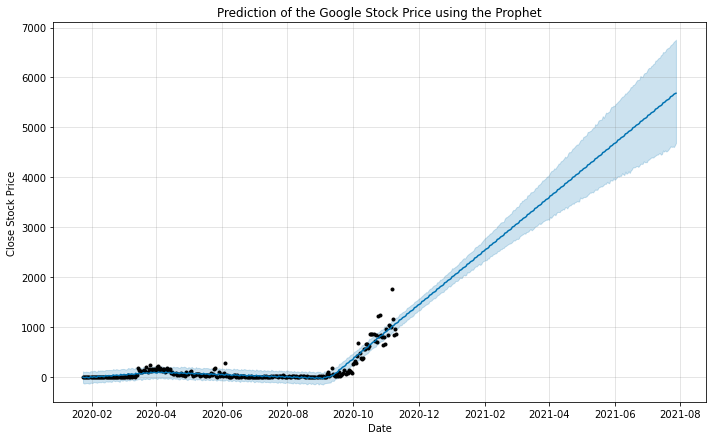

In [14]:
m.plot(fbp_prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [16]:
print('Benchmarking:')

print('Random Forest:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,rf_prediction))}")
print(f"Rsquared: {r2_score(y_test,rf_prediction)}")
print()
print('Decision Tree:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,tree_prediction))}")
print(f"Rsquared: {r2_score(y_test,tree_prediction)}")
print()
print('FBProphet:')
print(f"RMSE: {np.sqrt(mean_squared_error(prop_test['y'],fbp_prediction['yhat'][len(prop_train):len(q1_df)]))}")
print(f"Rsquared: {r2_score(prop_test['y'],fbp_prediction['yhat'][len(prop_train):len(q1_df)])}")
print()

Benchmarking:
Random Forest:
RMSE: 495.0388056727959
Rsquared: 0.4895798020737441

Decision Tree:
RMSE: 568.4095194130726
Rsquared: 0.3270666557400731

FBProphet:
RMSE: 574.627797585382
Rsquared: 0.5218068206603955



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



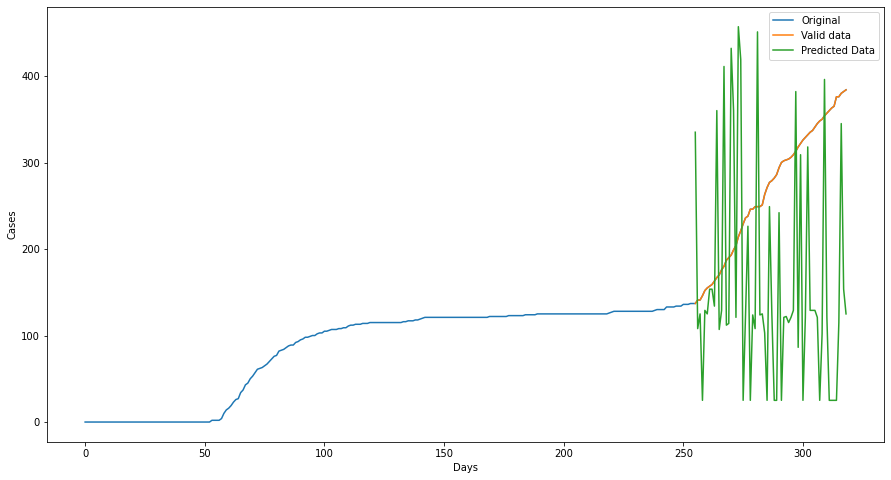

In [8]:
tree_regression(covid_data[['death']], 'death')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



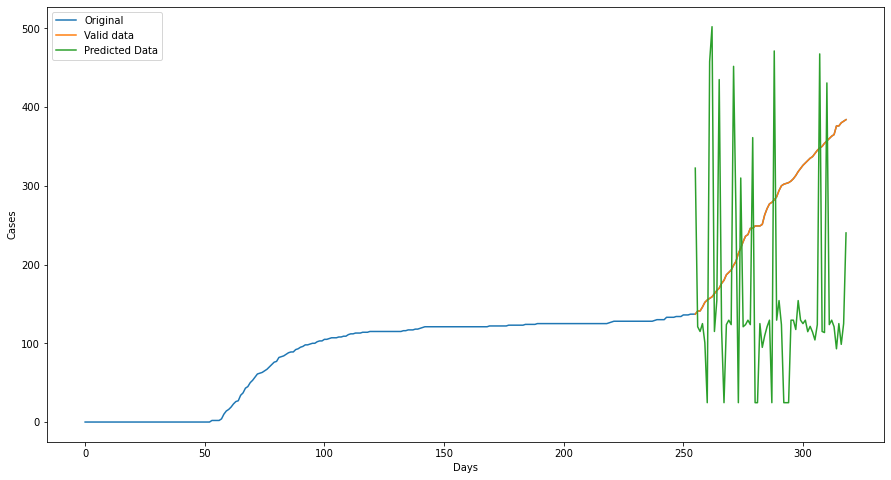

In [9]:
rf_regression(covid_data[['death']], 'death')

# Question 2

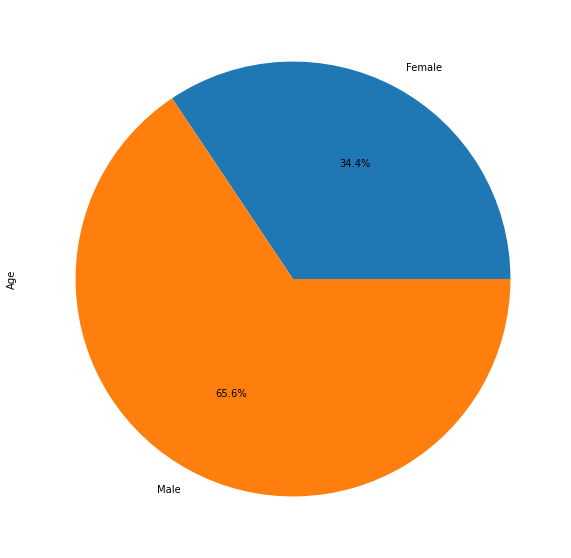

In [17]:
pie_df = gender_data.groupby('Gender').count()
gender_data['Deceased Date'] = pd.to_datetime(gender_data['Deceased Date'], format='%d/%m/%Y')
q2_male = gender_data.loc[gender_data['Gender']=='Male']
q2_female = gender_data.loc[gender_data['Gender']=='Female']

plot = pie_df['Age'].plot.pie(y='Gender', figsize=(15,10), autopct='%1.1f%%')

In [18]:
q2_male2 = pd.DataFrame(q2_male.groupby('Deceased Date')['Gender'].count())
q2_female2 = pd.DataFrame(q2_female.groupby('Deceased Date')['Gender'].count())

days = pd.date_range('2020-03-17', '2021-01-23', freq='D')

q2_male3 = q2_male2.reindex(days).fillna(0)
q2_male3 = q2_male3.rename(columns={'Gender': 'Male Deaths'})
q2_female3 = q2_female2.reindex(days).fillna(0)
q2_female3 = q2_female3.rename(columns={'Gender': 'Female Deaths'})

q2_female3

,Female Deaths
2020-03-17,0.0
2020-03-18,1.0
2020-03-19,0.0
2020-03-20,0.0
2020-03-21,1.0
...,...
2021-01-19,4.0
2021-01-20,5.0
2021-01-21,4.0
2021-01-22,7.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



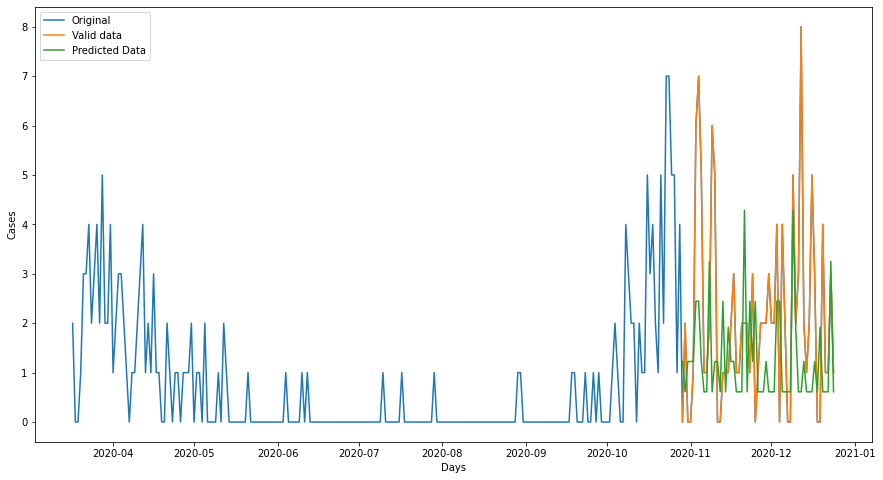

In [19]:
tree_regression(q2_male3[['Male Deaths']], 'Male Deaths')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



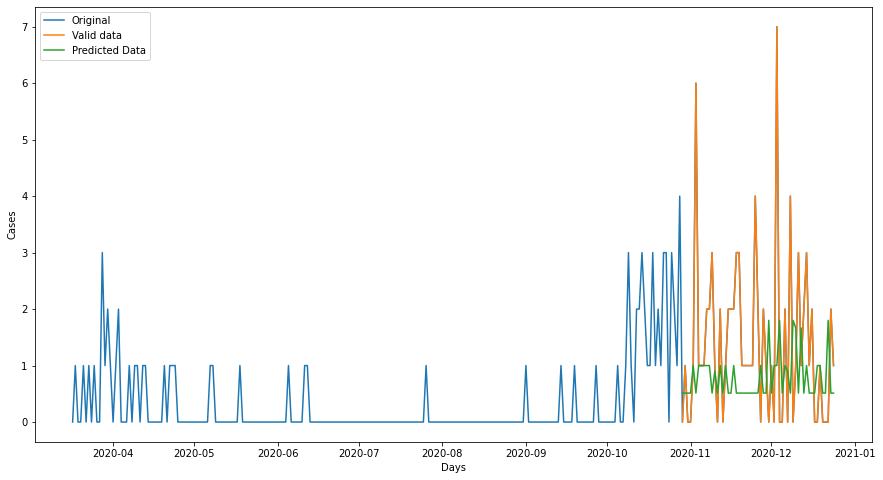

In [20]:
tree_regression(q2_female3[['Female Deaths']], 'Female Deaths')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



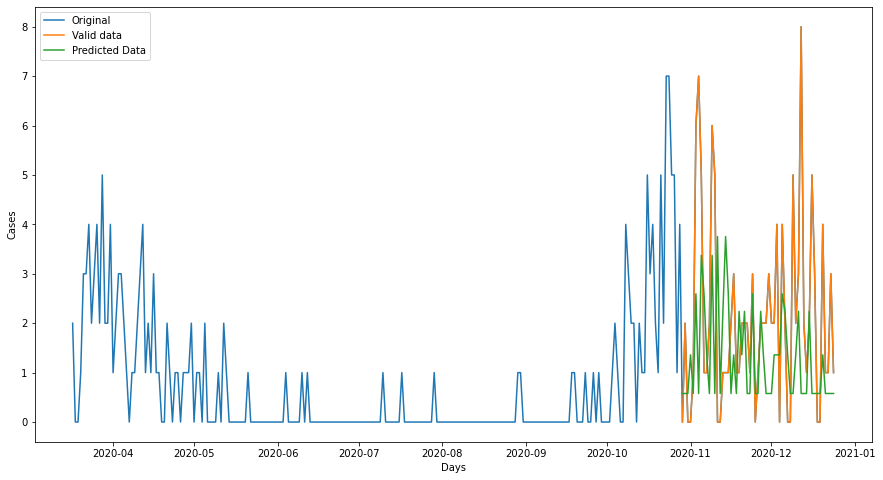

In [21]:
rf_regression(q2_male3[['Male Deaths']], 'Male Deaths')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



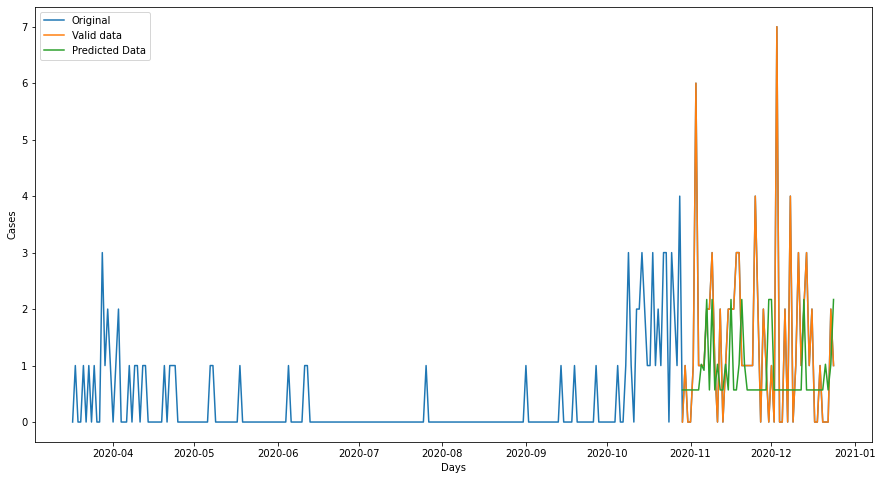

In [22]:
rf_regression(q2_female3[['Female Deaths']], 'Female Deaths')

In [23]:
q2_male4 = q2_male3
q2_male4['Deceased Date'] = q2_male4.index

q2_female4 = q2_female3
q2_female4['Deceased Date'] = q2_female4.index

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


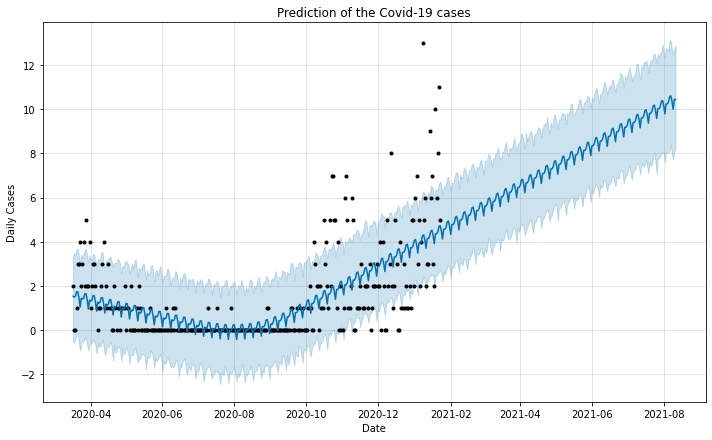

In [24]:
fb_prediction(q2_male4[['Deceased Date', 'Male Deaths']], 'Deceased Date', 'Male Deaths')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


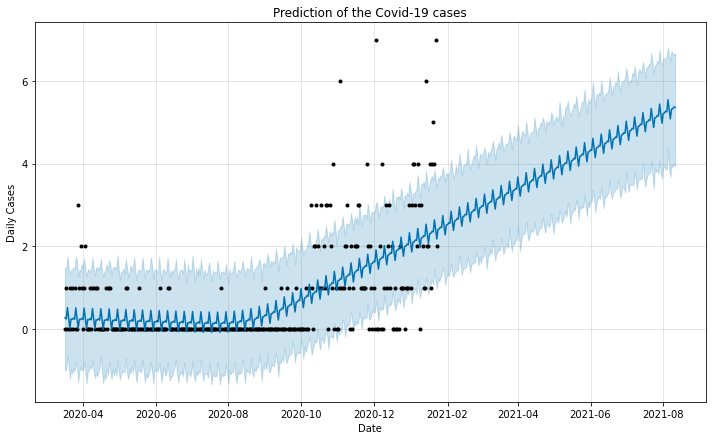

In [25]:
fb_prediction(q2_female4[['Deceased Date', 'Female Deaths']], 'Deceased Date', 'Female Deaths')

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
import math
from fbprophet import Prophet as pp

data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_death.csv')
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

teen = data[['date', 'Teenager']]
teen = teen.rename(columns = {"date":"ds","Teenager":"y"})

adult = data[['date', 'Adult']]
adult = adult.rename(columns = {"date":"ds","Adult":"y"})

old = data[['date', 'Old']]
old = old.rename(columns = {"date":"ds","Old":"y"})

total = data[['date', 'total_death']]
total = total.rename(columns = {"date":"ds","total_death":"y"})


def predict(age):
  df = age[:-3]
  future = age[-3:]

  train_len = math.ceil(len(df))
  train = df[:train_len]
  test = df[train_len:]

  m = pp(daily_seasonality=True)
  m.fit(train)

  future = m.make_future_dataframe(periods=200)
  prediction = m.predict(future)
  return prediction, df

def y_axis(prediction, df):
  y_pred = prediction['yhat'].values
  y_true = df['y'].values
  return y_pred, y_true

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

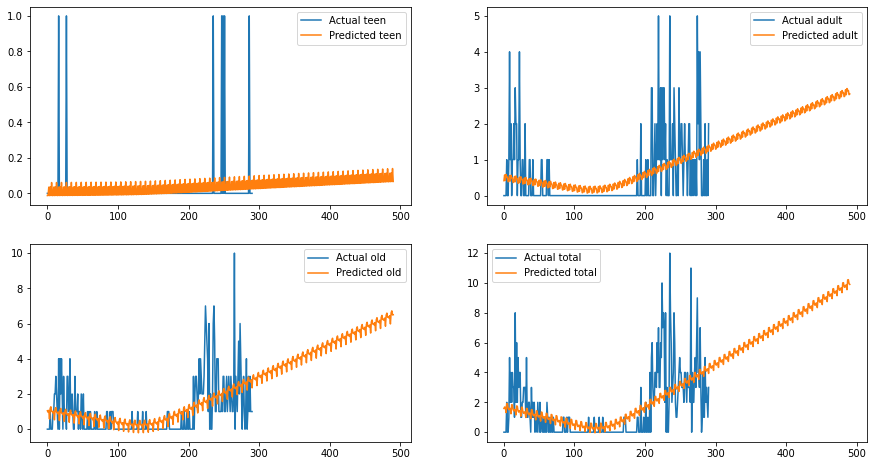

In [27]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.plot(y_axis(predict(teen)[0], predict(teen)[1])[1], label='Actual teen')
plt.plot(y_axis(predict(teen)[0], predict(teen)[1])[0], label='Predicted teen')
plt.legend()

plt.subplot(2,2,2)
plt.plot(y_axis(predict(adult)[0], predict(adult)[1])[1], label='Actual adult')
plt.plot(y_axis(predict(adult)[0], predict(adult)[1])[0], label='Predicted adult')
plt.legend()

plt.subplot(2,2,3)
plt.plot(y_axis(predict(old)[0], predict(old)[1])[1], label='Actual old')
plt.plot(y_axis(predict(old)[0], predict(old)[1])[0], label='Predicted old')
plt.legend()

plt.subplot(2,2,4)
plt.plot(y_axis(predict(total)[0], predict(total)[1])[1], label='Actual total')
plt.plot(y_axis(predict(total)[0], predict(total)[1])[0], label='Predicted total')
plt.legend()

plt.show()

# Question 3

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime as dt
import math


def predict(column, ylabel):
  data = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_data.csv')
  data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
  data = data[['Date', column]]
  data = data.rename(columns = {"Date":"ds", column:"y"})
  df = data[:-3]
  future = data[-3:]

  train_len = math.ceil(len(df))
  train = df[:train_len]
  test = df[train_len:]

  from fbprophet import Prophet as pp

  m = pp(daily_seasonality=True)
  m.fit(train)

  future = m.make_future_dataframe(periods=200) #we need to specify the number of days in future
  prediction = m.predict(future)
  m.plot(prediction)
  plt.title("Prediction of the covid 19 using the Prophet")
  plt.xlabel("Date")
  plt.ylabel(ylabel)
  plt.legend(["actual", "forecast"])
  plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


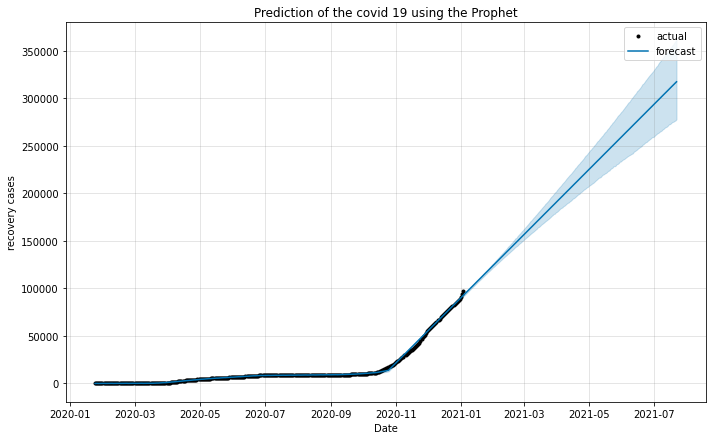

In [29]:
predict("discharged", "recovery cases")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


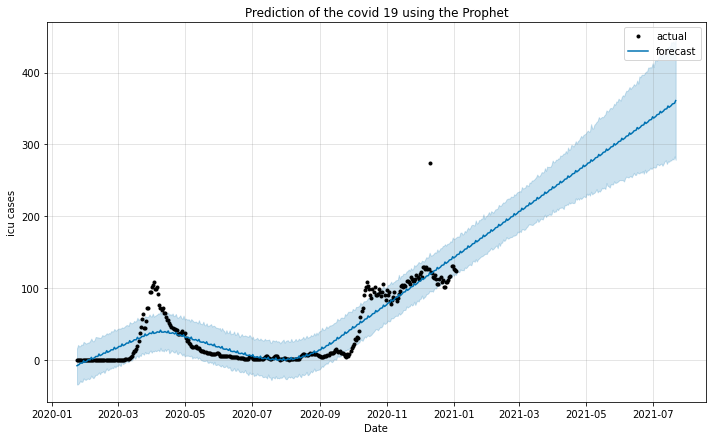

In [30]:
predict("icu", "icu cases")